In [6]:
#imports
import pandas as pd
import json
import matplotlib.pyplot as plt 
import geopandas as gpd

In [2]:

#importing data
f=open('results1.json')
data=json.load(f)
f.close()
df=pd.DataFrame(data)

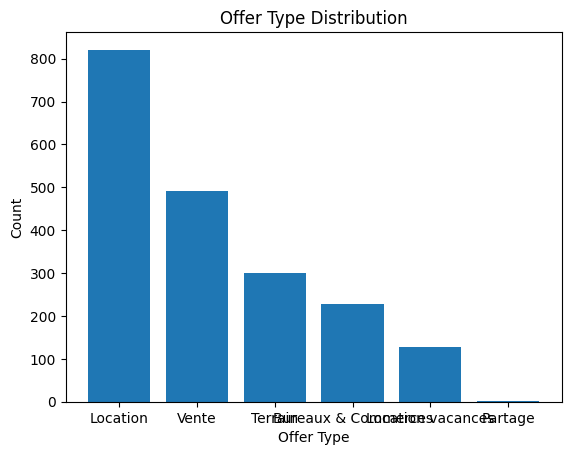

In [3]:
#Offer type distribution

offer_types = df['offer_type'].value_counts()

plt.bar(offer_types.index, offer_types.values)
plt.xlabel('Offer Type')
plt.ylabel('Count')
plt.title('Offer Type Distribution')
plt.show()

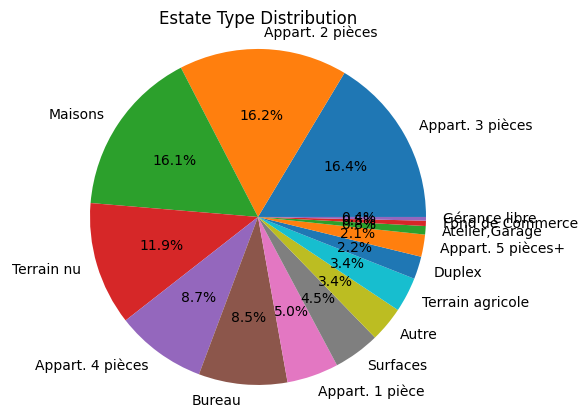

In [5]:
#estate type distribution

estate_types = df['estate_type'].value_counts()

plt.pie(estate_types.values, labels=estate_types.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Estate Type Distribution')
plt.show()


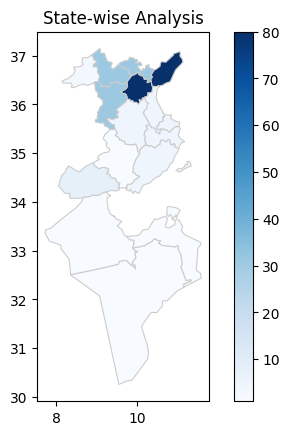

In [10]:
#State-wise analysis

states = gpd.read_file('TN-gouvernorats.geojson')
state_counts = df['state'].value_counts()
states = states.merge(state_counts, left_on='gouv_fr', right_index=True, how='left')

states.plot(column='state', cmap='Blues', linewidth=0.8, edgecolor='0.8', legend=True)
plt.title('State-wise Analysis')
plt.show()

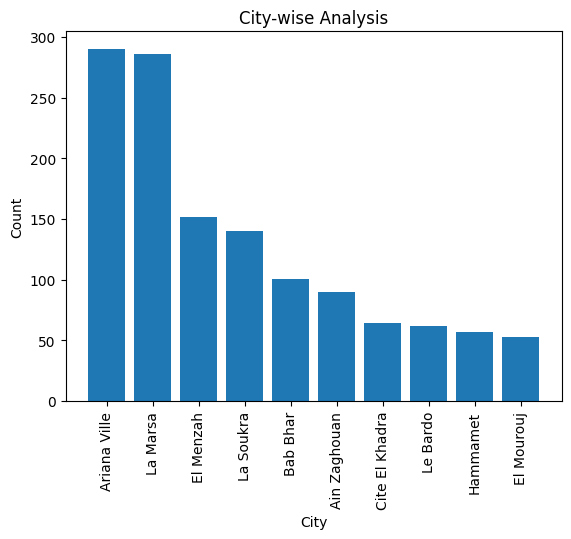

In [12]:
#City-wise analysis
city_counts = df['city'].value_counts().head(10)  # top 10 cities

plt.bar(city_counts.index, city_counts.values)
plt.xlabel('City')
plt.ylabel('Count')
plt.title('City-wise Analysis')
plt.xticks(rotation=90)
plt.show()


In [13]:
#Price distribution


plt.hist(df['price_in_TND'], bins=20)
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Price Distribution')
plt.show()


KeyError: 'price'